# EDA for Retail Store Data

### Import Packages

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
sns.set()

### Load and Inspect Data 

In [2]:
df = pd.read_csv('SampleSuperstore.csv')

In [3]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
df.shape

(9994, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [9]:
df.drop('Postal Code',axis=1,inplace=True)

### EDA

In [10]:
df.describe().round(1)

,Sales,Quantity,Discount,Profit
count,9994.0,9994.0,9994.0,9994.0
mean,229.9,3.8,0.2,28.7
std,623.2,2.2,0.2,234.3
min,0.4,1.0,0.0,-6600.0
25%,17.3,2.0,0.0,1.7
50%,54.5,3.0,0.2,8.7
75%,209.9,5.0,0.2,29.4
max,22638.5,14.0,0.8,8400.0


<AxesSubplot: xlabel='Sales', ylabel='Profit'>

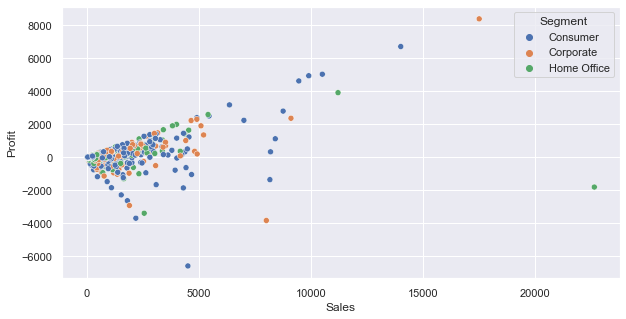

In [18]:
plt.figure(figsize=(10,5))
sns.scatterplot(data=df,x='Sales',y='Profit',hue='Segment')

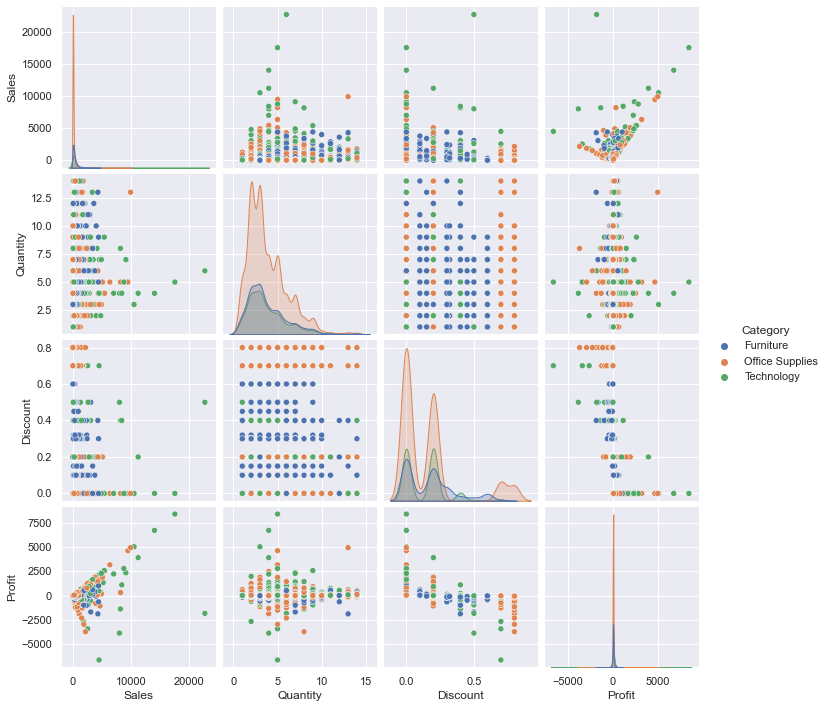

In [26]:
sns.pairplot(data=df,hue='Category')

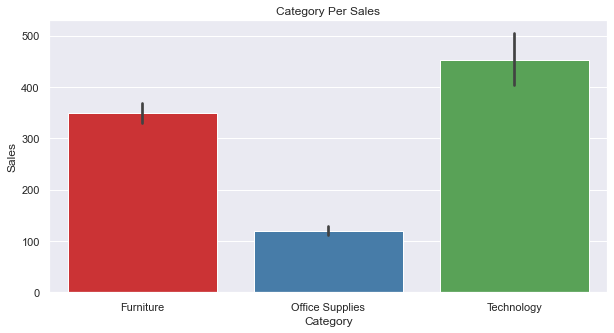

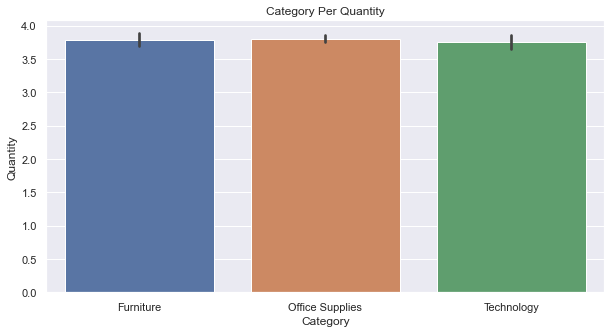

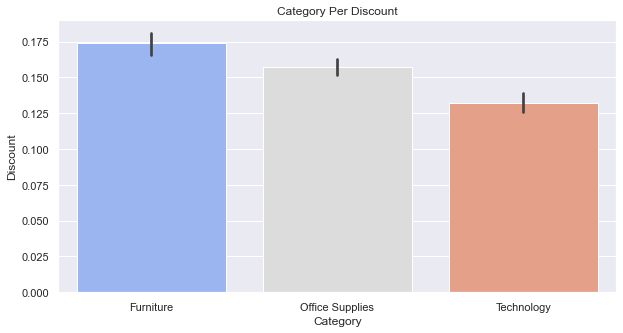

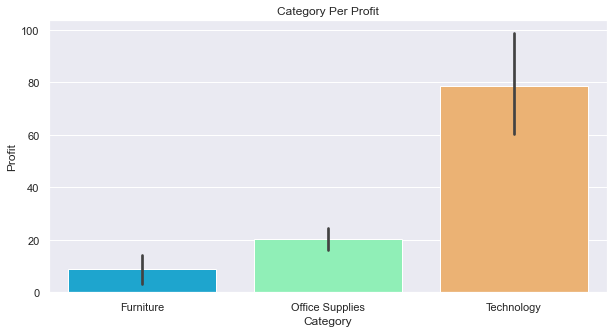

In [30]:
plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Category',y='Sales',palette='Set1')
plt.title('Category Per Sales')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Category',y='Quantity')
plt.title('Category Per Quantity')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Category',y='Discount',palette='coolwarm')
plt.title('Category Per Discount')
plt.show()

plt.figure(figsize=(10,5))
sns.barplot(data=df,x='Category',y='Profit',palette='rainbow')
plt.title('Category Per Profit')
plt.show()

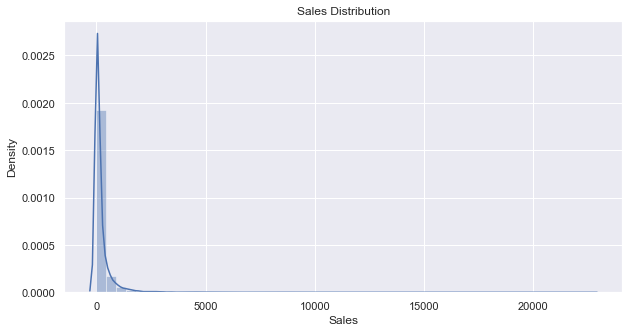

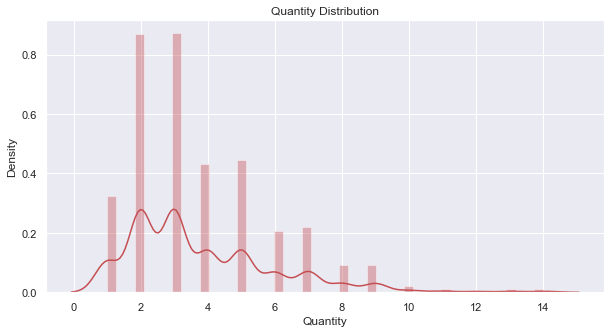

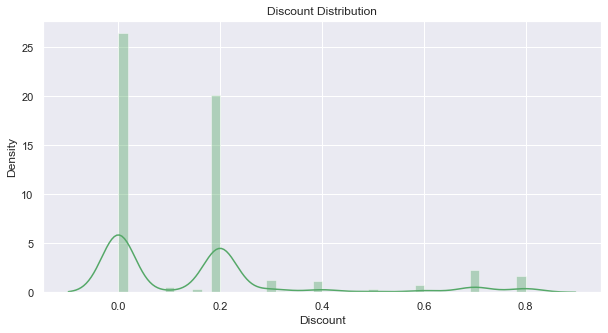

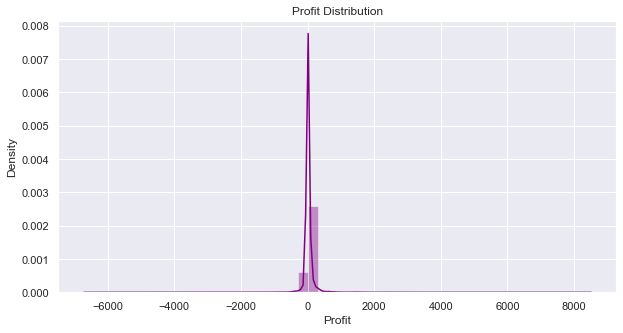

In [34]:
plt.figure(figsize=(10,5))
sns.distplot(df['Sales'])
plt.title('Sales Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.distplot(df['Quantity'],color='r')
plt.title('Quantity Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.distplot(df['Discount'],color='g')
plt.title('Discount Distribution')
plt.show()

plt.figure(figsize=(10,5))
sns.distplot(df['Profit'],color='purple')
plt.title('Profit Distribution')
plt.show()

In [38]:
# What are the different ship modes available? Which ship mode is the most commonly used?
df.groupby('Ship Mode')['Sales'].max().sort_values(ascending=False)

Ship Mode
Standard Class    22638.48
First Class       13999.96
Second Class       8749.95
Same Day           7999.98
Name: Sales, dtype: float64

Text(0.5, 1.0, 'Sales Distribution across Segments')

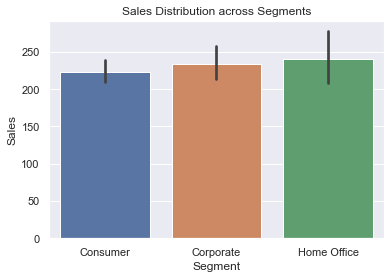

In [42]:
# How is the sales distributed across different segments (e.g., consumer, corporate, home office)?
sns.barplot(x='Segment',y='Sales',data=df)
plt.title('Sales Distribution across Segments')

In [54]:
# Which state have the highest sales ?
df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(1)

State
California    457687.6315
Name: Sales, dtype: float64

In [55]:
# Which state have the highest profits?
df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(1)

State
California    76381.3871
Name: Profit, dtype: float64

In [53]:
# Which City have the highest sales?
df.groupby('City')['Sales'].sum().sort_values(ascending=False).head(1)

City
New York City    256368.161
Name: Sales, dtype: float64

In [57]:
# Which city have the highest profits?
df.groupby('City')['Profit'].sum().sort_values(ascending=False).head(1)

City
New York City    62036.9837
Name: Profit, dtype: float64

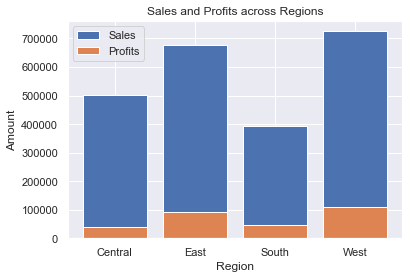

In [62]:
# How do the sales and profits vary across different regions?
region_sales = df.groupby('Region')['Sales'].sum()
region_profits = df.groupby('Region')['Profit'].sum()
plt.bar(region_sales.index, region_sales.values, label='Sales')
plt.bar(region_profits.index, region_profits.values, label='Profits')
plt.xlabel('Region')
plt.ylabel('Amount')
plt.title('Sales and Profits across Regions')
plt.legend()
plt.show()

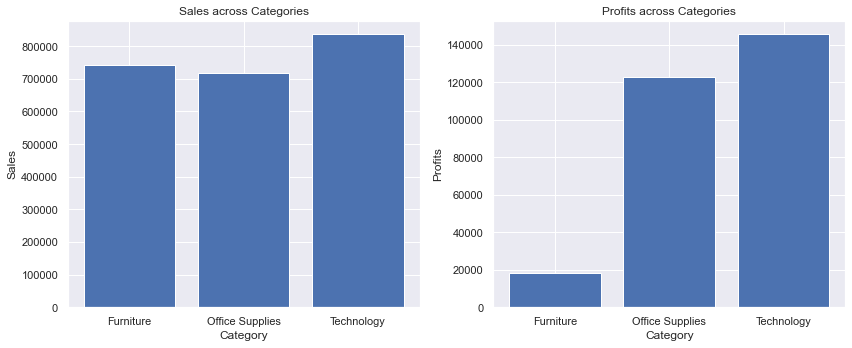

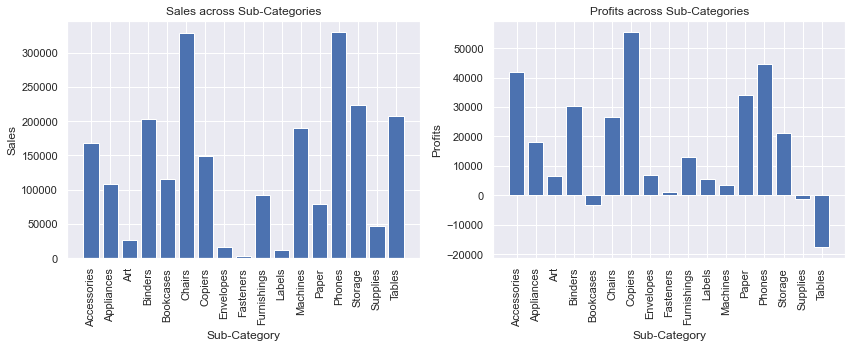

In [63]:
# Which product categories and sub-categories have the highest sales and profits?
category_sales = df.groupby('Category')['Sales'].sum()
category_profits = df.groupby('Category')['Profit'].sum()
subcategory_sales = df.groupby('Sub-Category')['Sales'].sum()
subcategory_profits = df.groupby('Sub-Category')['Profit'].sum()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(category_sales.index, category_sales.values)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.title('Sales across Categories')
plt.subplot(1, 2, 2)
plt.bar(category_profits.index, category_profits.values)
plt.xlabel('Category')
plt.ylabel('Profits')
plt.title('Profits across Categories')
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.bar(subcategory_sales.index, subcategory_sales.values)
plt.xlabel('Sub-Category')
plt.ylabel('Sales')
plt.title('Sales across Sub-Categories')
plt.xticks(rotation='vertical')
plt.subplot(1, 2, 2)
plt.bar(subcategory_profits.index, subcategory_profits.values)
plt.xlabel('Sub-Category')
plt.ylabel('Profits')
plt.title('Profits across Sub-Categories')
plt.xticks(rotation='vertical')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Effect of Discount on Profits')

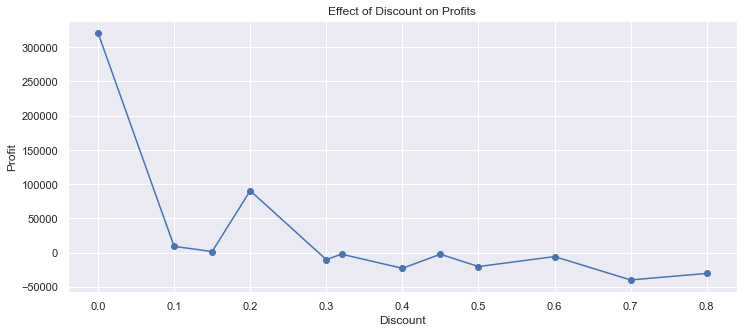

In [69]:
# How does the discount affect the overall profitability of the orders?
discount_profit = df.groupby('Discount').sum()['Profit']
plt.figure(figsize=(12, 5))
plt.plot(discount_profit.index, discount_profit.values,marker='o')
plt.xlabel('Discount')
plt.ylabel('Profit')
plt.title('Effect of Discount on Profits')
plt.show()

In [76]:
df.groupby('Region').sum()[{'Sales','Quantity','Discount','Profit'}]

,Profit,Quantity,Sales,Discount
Region,,,,
Central,39706.3625,8780,501239.8908,558.34
East,91522.7800,10618,678781.2400,414.00
South,46749.4303,6209,391721.9050,238.55
West,108418.4489,12266,725457.8245,350.20


In [78]:
df.groupby('Ship Mode').mean()[{'Sales','Quantity','Discount','Profit'}]

,Profit,Quantity,Sales,Discount
Ship Mode,,,,
First Class,31.839948,3.701560,228.497024,0.164610
Same Day,29.266591,3.609576,236.396179,0.152394
Second Class,29.535545,3.816452,236.089239,0.138895
Standard Class,27.494770,3.819873,227.583067,0.160023


Text(0.5, 1.0, 'Variables Correlation')

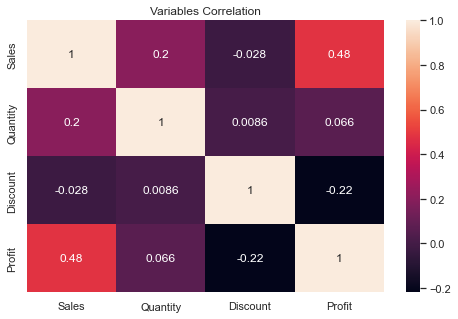

In [84]:
plt.figure(figsize=(8,5))
sns.heatmap(df.corr(),annot=True)
plt.title('Variables Correlation')

# 